In [1]:
import requests
from bs4 import BeautifulSoup

# Работа с динамическими сайтами

Мы с вами уже довольно уверенно умеем пользоваться Интернетом через питон, благодаря парсингу HTML страниц и запросам к API. Но проблема состоит в том, что парсинг HTML страниц это не панацея. Данный подход работает только для **статических** веб страниц, то есть мы не умеем заполять различные поля для ввода на сайтах и "нажимать" на кнопки при помощи питона. Сегодня мы как раз таки научимся так делать

В данной лекции мы научимся взаимодействовать с **формами** через Python. В этой лекции будет присутствовать много примеров HTML кода, открывайте ячейки для редактирования, чтобы просматривать его

## HTML формы

### Структура формы

**Формы** &mdash; это способ коммуникации сайта с пользователем. Форма представляет из себя различные поля для ввода, это позволяет нам передавать сайту произвольные данные, например:
1. Текст
    + Логин
    + Пароль
    + email
    + Текст поста в соцсети
    + и др
2. Файл
3. Выбор из нескольких вариантов
4. Checkboxes и radiobuttons
5. и многое другое

В HTML формы выглядят примерно вот так (откройте ячейку для редактирования, чтобы посмотреть на HTML код)

<form action="/submit-form" method="POST">
  <label for="name">Name:</label>
  <input type="text" id="name" name="name" required><br><br>

  <label for="email">Email:</label>
  <input type="email" id="email" name="email" required><br><br>

  <label for="password">Password:</label>
  <input type="password" id="password" name="password" minlength="8" required><br><br>

  <label for="age">Age:</label>
  <input type="number" id="age" name="age" min="18" max="100" required><br><br>

  <label for="gender">Gender:</label>
  <select id="gender" name="gender" required>
    <option value="">--Please choose an option--</option>
    <option value="male">Male</option>
    <option value="female">Female</option>
    <option value="other">Other</option>
  </select><br><br>

  <label for="birthdate">Date of Birth:</label>
  <input type="date" id="birthdate" name="birthdate" required><br><br>

  <label for="color">Favorite Color:</label>
  <input type="color" id="color" name="color" required><br><br>

  <label for="file">Upload a file:</label>
  <input type="file" id="file" name="file"><br><br>

  <label for="terms">Agree to terms and conditions:</label>
  <input type="checkbox" id="terms" name="terms" required><br><br>

  <input type="submit" value="Submit">
</form>


Формы имеют ряд особенностей:
1. Формы образуются при помощи тэга `form`
    + Формы имеют атрибут `action`, значение в этом атрибуте показывает по какому адресу будет произведён запрос при отправке формы
    + Формы имеют атрибут `method`, значение в этом атрибуте показывает какой метод запроса будет использован при отправке формы (чаще всего с формами используется POST)
2. Внутри формы (между открывающим и закрывающим тегами `form`) находятся разнообразные поля для ввода данных
    + Чаще всего поля для ввода данных образованы тэгами `input`, но бывают и исключения (тэги `select`-`option` в примере выше)
    + Поля для ввода могут иметь свои атрибуты, которые влияют на тип вводимых данных. Например, `<input type="file">` позволит загрузить файл, а `<input type="checkbox">` позволит поставить галочку
    + Поля для ввода внутри форм могут иметь атрибут `name`, который будет нам крайне полезен в дальнейшем
    + У форм могут быть **скрытые** поля для ввода, они образуются при помощи тэга `<input type="hidden">`. Такие поля не видны пользователю в браузере <input type="hidden">
3. Формы зачастую имеют специальную кнопку, предназначенную для отправки введённых данных. Она может быть представлена тэгами `<input type="submit">` или `<button type="submit">`

### Что происходит при отправке формы?

Допустим, что мы ввели все необходимые данные в форму и нажали на кнопку "Submit". Что произойдёт дальше?

Сразу же начнёт составляться HTML запрос. При этом будет использован метод запроса из атрибута `method` формы. Затем начнёт формироваться тело запроса из данных, которые мы предоставили. Но тело запроса ещё необходимо представить в каком-то удобном формате, поэтому его нужно определённым образом форматировать (закодировать). Это можно сделать различными методами, среди которых:
1. `application/x-www-form-urlencoded`
2. `multipart/form-data`
3. `text/plain`
4. `application/json`
5. и так далее

Любой из данных методов можно указать как значение атрибута `enctype` в тэге `form`.

Многие из доступных форматов кодирования используют ключи и значения, так как это очень удобно. Например, при заполнении формы <input name="some_text_field" value="some_value"> и её отправке, с использованием большинства типов кодировок в запросе, эти данные будут храниться в формате ключ-значение, где **ключом выступает значение атрибута `name`** в поле для ввода, а в качестве **значения** будут **введённые данные** или, если они не были введены, то **значение атрибута `value`**

Далее мы посмотрим на разные кодировки и содержимое тела запроса при заполнении данной формы

<form action="/submit-form" method="POST">
  <label for="name">Name:</label>
  <input type="text" id="name" name="name" value="John Doe" required><br><br>

  <label for="email">Email:</label>
  <input type="email" id="email" name="email" value="johndoe@example.com" required><br><br>

  <label for="age">Age:</label>
  <input type="number" id="age" name="age" value="30" min="18" max="100" required><br><br>

  <label for="newsletter">Subscribe to newsletter:</label>
  <input type="checkbox" id="newsletter" name="newsletter" checked><br><br>

  <label for="gender">Gender:</label>
  <select id="gender" name="gender" required>
    <option value="">--Please choose an option--</option>
    <option value="male">Male</option>
    <option value="female">Female</option>
    <option value="other" selected>Other</option>
  </select><br><br>

  <button type="submit">Submit</button>
</form>

#### application/x-www-form-urlencoded

Это самая простая кодировка. В ней все пары ключ-значение соединяются через `=` и разделяются `&`. Почти как в query string, но здесь это не часть URL, а часть тела запроса.

Тело запроса с такой кодировкой при отправке формы выше будет выглядеть вот так

```
name=John+Doe&email=johndoe%40example.com&age=30&newsletter=on&gender=other
```

**Ключи** здесь **соответствуют значениям атрибутов `name`** в полях для ввода, а **значения данным введённым или выбранным пользователем**. Обратите внимание, что значение для галочки это `on`, хотя ни в коде, ни глядя на отрисованную форму мы такого не видим. Позже мы научимся определять значения для таких необычных данных.

Данная кодировка крайне широко используется для простых запросов, но, например, она не поддерживает бинарные данные, поэтому при помощи неё нельзя передать произвольный файл по типу картинки

#### multipart/form-data

Более необычный, но также очень широко распространённый тип кодировки тела запроса. Здесь данные также представлены в формате ключ-значение, но разные пары ключ-значение отделены друг от друга более сложным образом

```
------WebKitFormBoundaryABC123
Content-Disposition: form-data; name="name"

John Doe
------WebKitFormBoundaryABC123
Content-Disposition: form-data; name="email"

johndoe@example.com
------WebKitFormBoundaryABC123
Content-Disposition: form-data; name="age"

30
------WebKitFormBoundaryABC123
Content-Disposition: form-data; name="newsletter"

on
------WebKitFormBoundaryABC123
Content-Disposition: form-data; name="gender"

Other
------WebKitFormBoundaryABC123--
```

Данная кодировка позволяет передавать произвольные бинарные данные (то есть можно передать любой файл), а также используется для передачи больших объёмов данных. При передаче файлов в 99% случаев используется именно она.

#### application/json

C JSON мы уже знакомы, тело запроса с такой кодировкой будет выглядеть вот так

```
{
  "name": "John Doe",
  "email": "johndoe@example.com",
  "age": 30,
  "newsletter": true,
  "gender": "Other"
}
```

#### plain/text

Данная кодировка намного менее распространённая, чем те, которые обсуждались выше. Тело запроса будет выглядеть вот так
```
John Doe
johndoe@example.com
30
on
Other
```

Это просто список значений по одному на каждой строке, даже без ключей

#### Зачем нам все эти кодировки?

Нам не особо важно знать, что будет внутри запроса, но для нашей работы нам нужно запомнить несколько важных моментов касательно отправки форм:
1. В подавляющем большинстве случаев при отправке данных через форму **нам нужны пары ключ-значение** для всех наших данных
2. **Ключи можно найти в атрибутах `name`** тэгов, осуществляющих ввод данных (`input`, `select`, ...) и находящихся внутри формы
3. **Значениями выступают те данные, которые мы ввели**. В случае текста это введённый текст, в случае галочки это её статус on/off true/false, в случае загрузки файла это последовательность байтов в файле и так далее. Если мы не вводили данные, то используется **значение из атрибутов `value`** тэгов, осуществляющих ввод данных (`input`, `select`, ...) и находящихся внутри формы, к примеру, это могут быть значения по-умолчанию для опциональных полей для ввода или значения для скрытых полей

После того, как мы составили тело запроса, нам нужно его отправить. Адрес для отправки указан в атрибуте `action` тэга `form`. Как правило, там указывается относительный URL. То есть при отправке формы `<form action="/some/url/path"></form>` на сайте `site.com`, мы отправим запрос на `https://site.com/some/url/path`

### Круто, а как сделать тоже самое в питоне?

1. Находим метод запроса в атрибуте `method` формы
2. Находим адрес в атрибуте `action` формы
3. Находим все поля для ввода данных и их имена в атрибутах `name`
4. Придумываем значения для данных полей
5. Составляем пары ключ-значение из пунктов 3 и 4 (делаем словарь)
6. Собираем всё вместе и отправляем запрос

То есть запрос по отправке следующей формы из питона

<form action="/submit-form" method="POST">
  <label for="name">Name:</label>
  <input type="text" id="name" name="name" value="John Doe" required><br><br>

  <label for="email">Email:</label>
  <input type="email" id="email" name="email" value="johndoe@example.com" required><br><br>

  <label for="age">Age:</label>
  <input type="number" id="age" name="age" value="30" min="18" max="100" required><br><br>

  <label for="newsletter">Subscribe to newsletter:</label>
  <input type="checkbox" id="newsletter" name="newsletter" checked><br><br>

  <label for="gender">Gender:</label>
  <select id="gender" name="gender" required>
    <option value="">--Please choose an option--</option>
    <option value="male">Male</option>
    <option value="female">Female</option>
    <option value="other" selected>Other</option>
  </select><br><br>

  <button type="submit">Submit</button>
</form>

будет выглядеть как-то так

```python
site_url = "https://site.com"

form_data = {
    "name": "Jonh Doe",
    "email": "johndoe@example.com",
    "age": 30,
    "newsletter": "on",
    "gender": "other"
}

requests.post(site_url + "/submit-form", data=form_data)
```

Аргумент `data` в функции `requests.post` указывает, что данные передаются именно в теле запроса, а не в query string (для этого есть аргумент `params`)

### Примеры запросов с отправкой форм на "хороших" сайтах

Возьмём сайт [wooordhunt](https://wooordhunt.ru/), это Русско-Английский и Англо-Русский словарь. На главной странице в глаза бросается единственное поле для ввода, это и есть часть формы. Рассмотрим её подробнее в инструментах для разработчика

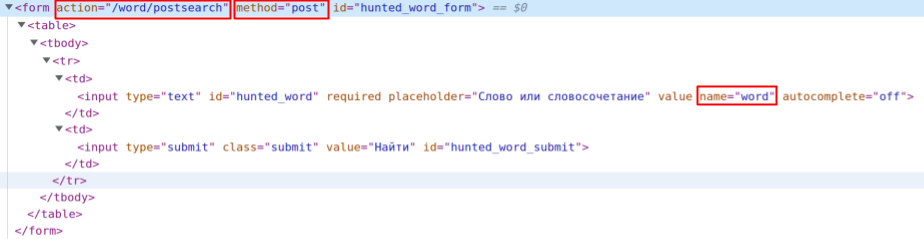

Это прекрасный учебный пример, короткая форма с один полем, где мы сразу видим все интересующие нас элементы для того, чтобы сделать запрос.

Составим запрос согласно инструкции выше и вытащим что-нибудь интересное из результатов

In [19]:
your_word = "Method"

response = requests.post("https://wooordhunt.ru/word/postsearch", data={"word": your_word})
soup = BeautifulSoup(response.content, "lxml")
soup.find("div", class_=lambda attr_val: attr_val.startswith("t_inline_") if attr_val else False).text

'метод, способ, методика, прием, порядок, система, классификация'

Работает! Но это, можно сказать, идеальный пример. К тому же, попробовав перевести несколько слов через браузер, мы увидим, что нужную информацию можно получить и при помощи GET запроса на нужный URL, например, `https://wooordhunt.ru/word/method`. Однако такое бывает далеко не везде

### Примеры запросов с отправкой форм на "плохих" сайтах

К сожалению, в реальной жизни всё иногда бывает не так просто, как в примере выше. Например, формы могут покрывать собой почти всю страницу, а некоторые критически важные для запроса **скрытые поля** бывает довольно трудно найти.

Для примера возьмём страницу с [геномом *Escherichia coli*](https://www.ncbi.nlm.nih.gov/nuccore/NC_002695.2) в GenBank.

❗❗❗Настоятельно рекомендую самостоятельно проделывать все описанные шаги в браузере, простое прочтение материала принесёт мало пользы и только заберёт ваше время.

Допустим, что мы хотим распарсить страницу с целью получения нуклеотидной последовательности. Изначально она не показана, поэтому если мы сделаем простой GET запрос на эту страницу, то не получим желаемого результата. Для отображения последовательности нам нужно будет раскрыть мини-меню справа и выбрать нужные опции, чтобы последовательность с заданным интервалом отобразилась на странице

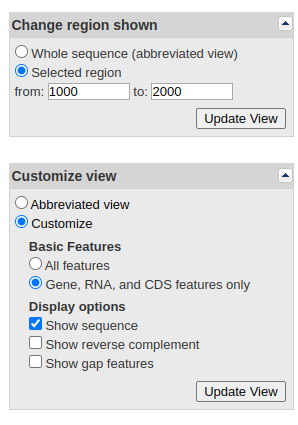

Затем нам потребуется нажать на кнопку "Update view", чтобы содержимое страницы обновилось согласно нашим хотелками. Обратите внимание, что после совершения этого действия в браузере, URL не изменился, то есть мы получили не новую страницу, а скорее изменили уже имеющуюся.

Проблема данной страницы заключается в том, что форма покрывает практически всё, в том числе поисковую строку сверху и совершенно не понятно, к чему данная форма относится, к поисковой строке или к настройке отображения последовательности, а может быть вообще к всему сразу

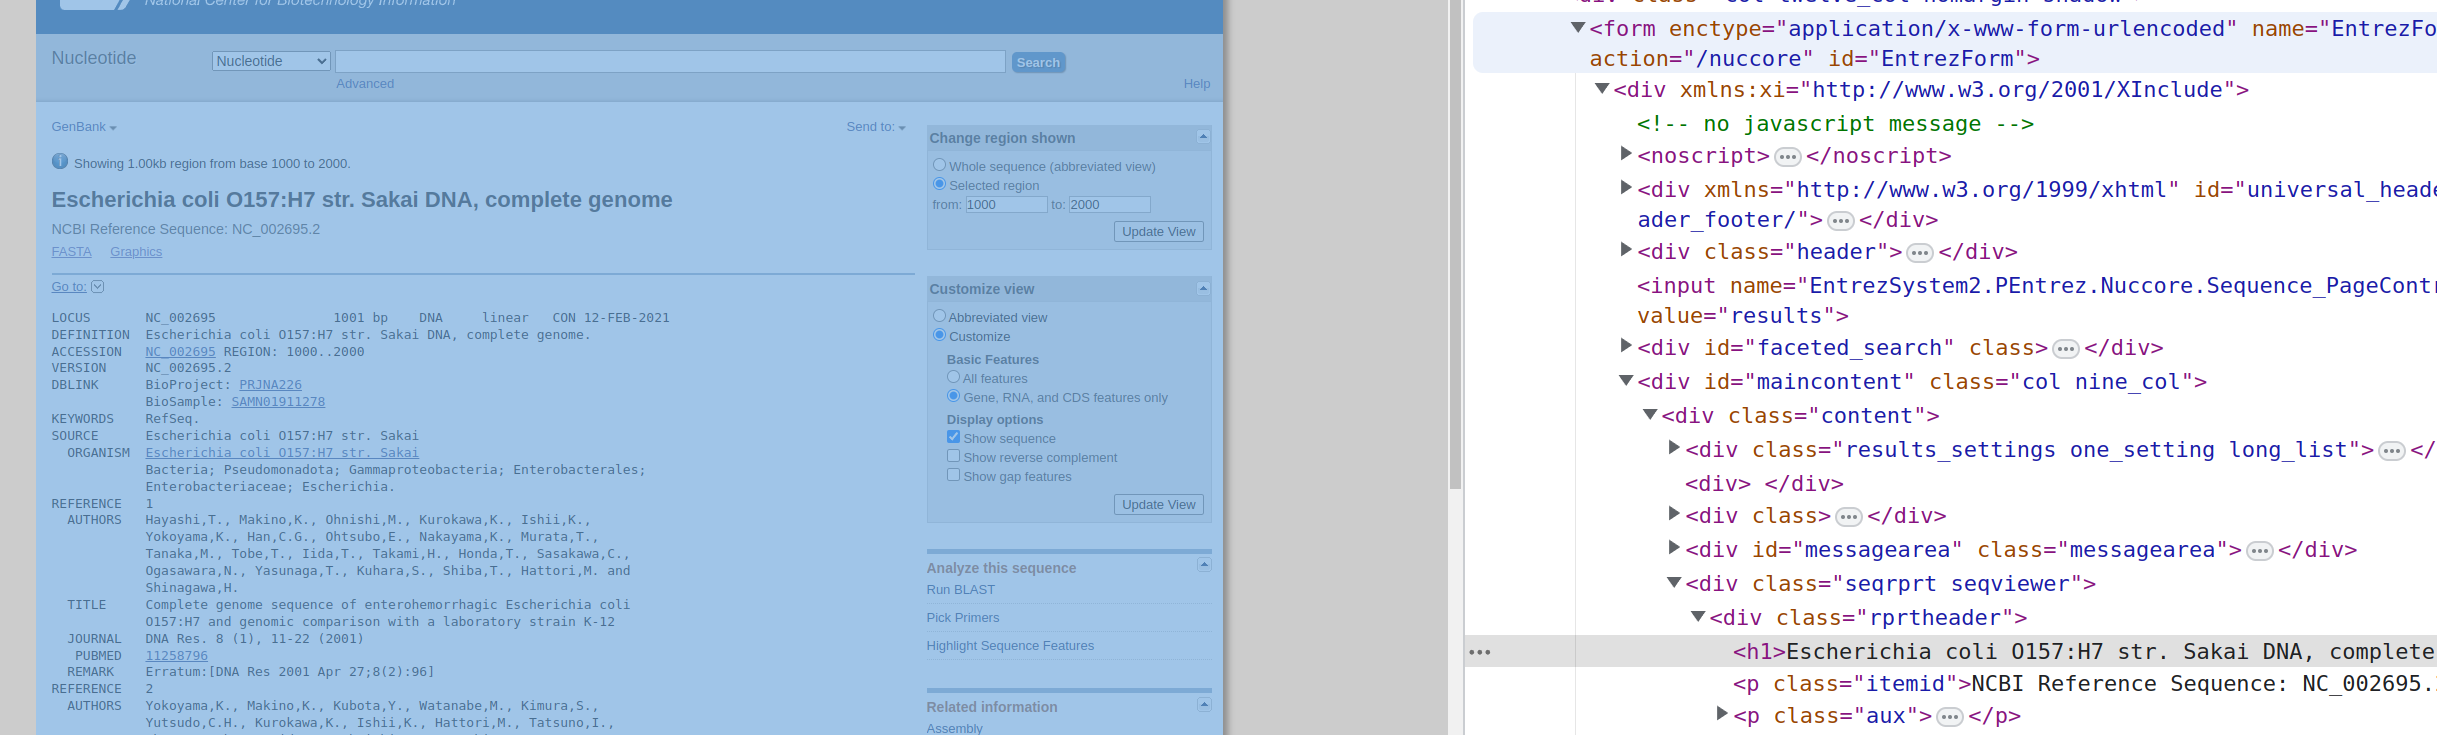

Ну ладно, может быть всё станет понятно, когда мы посмотрим на поля для ввода?

In [21]:
url = "https://www.ncbi.nlm.nih.gov/nuccore/NC_002695.2"
response = requests.get(url)
soup = BeautifulSoup(response.content, "lxml")
soup.find_all("input")

/home/roman/anaconda3/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


[<input autocomplete="off" class="jig-ncbiclearbutton jig-ncbiautocomplete" data-jigconfig="isEnabled:false,disableUrl:'NcbiSearchBarAutoComplCtrl'" data-sbconfig="ds:'no',pjs:'yes',afs:'yes'" id="term" name="term" title="Search Nucleotide" type="text" value=""/>,
 <input name="EntrezSystem2.PEntrez.Nuccore.Sequence_PageController.PreviousPageName" sid="1" type="hidden" value="results"/>,
 <input format="" id="docsum" name="EntrezSystem2.PEntrez.Nuccore.Sequence_ResultsPanel.Sequence_DisplayBar.sPresentation" sid="1" type="radio" value="docsum"/>,
 <input checked="true" format="" id="genbank" name="EntrezSystem2.PEntrez.Nuccore.Sequence_ResultsPanel.Sequence_DisplayBar.sPresentation" sid="2" type="radio" value="genbank"/>,
 <input format="" id="gbwithparts" name="EntrezSystem2.PEntrez.Nuccore.Sequence_ResultsPanel.Sequence_DisplayBar.sPresentation" sid="3" type="radio" value="gbwithparts"/>,
 <input format="" id="fasta" name="EntrezSystem2.PEntrez.Nuccore.Sequence_ResultsPanel.Sequence

Что-то многовато полей для ввода, разобраться будет сложно.

Хорошо, что для работы с такими сложными случаями есть альтернативный подход, который сильно упрощает жизнь, и, в том числе, работает с простыми случаями. Про него мы поговорим дальше

## Работа с вкладкой Network в инструментах для разработчика

Находясь нужной странице перейдите во вкладку **Network** в инструментах для разработчика. Её содержимое выглядит как-то вот так

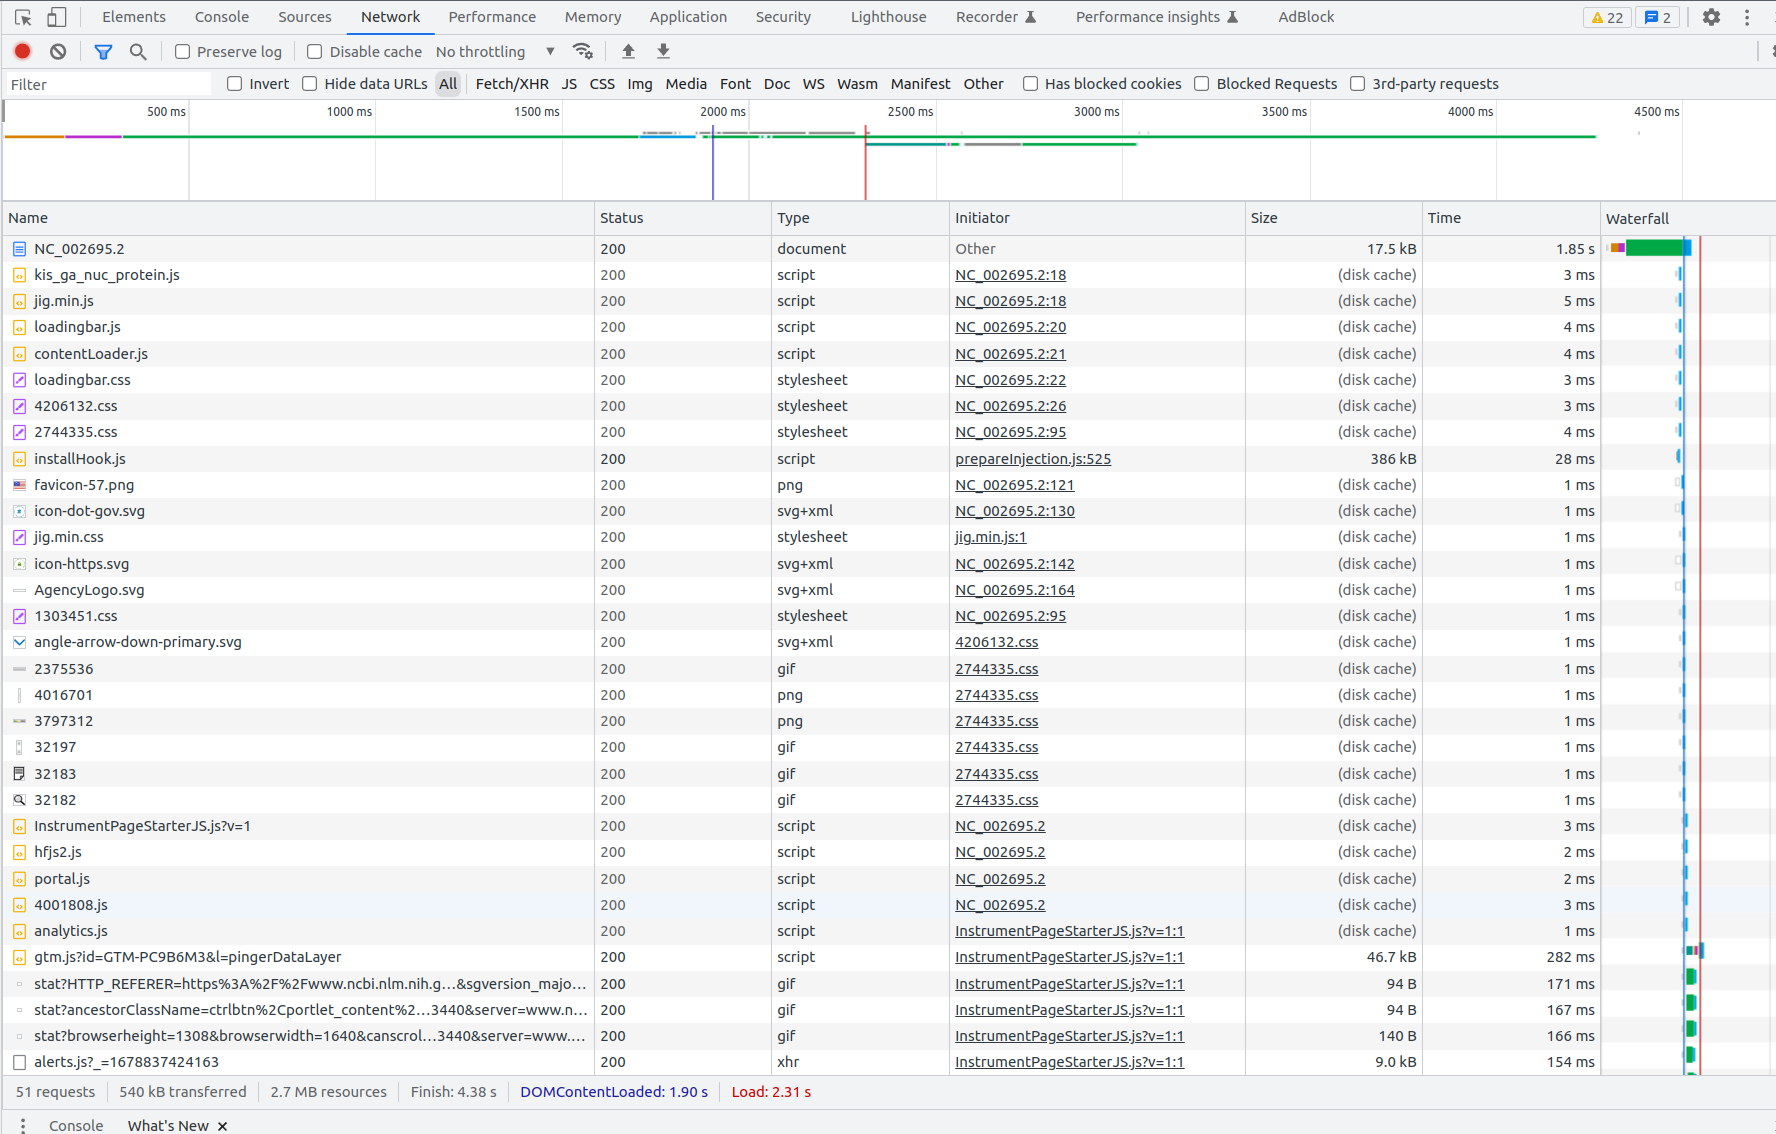

Выглядит немного страшно, но на самом деле тут всё просто, мы же в конце концов разработчики.

В данном меню у нас есть длинный список из **чего-то**.

Это **что-то** является **списком всех запросов**, которые наш браузер совершает в качестве клиента. Здесь в реальном времени отслеживаются абсолютно все запросы с данной страницы:
1. Запросы на получение картинок
2. Запросы на получение JavaScript 
3. Запросы на получение стилей
4. Запросы на получение файлов
5. **Запросы на получение HTML страниц**

Что же нам с этим делать? Процесс можно разделить на несколько этапов
1. Необходимо очистить список уже сохранённых запросов кнопкой 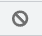 на панели сверху
2. Необходимо совершить нужное действие на странице. В нашем случае нажать на кнопку "Update view"

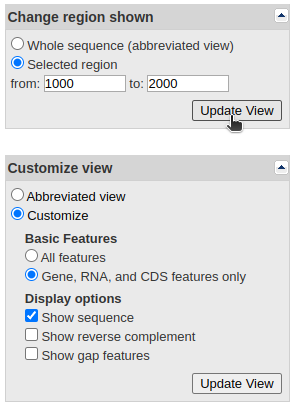

3. После нажатия на кнопку наш браузер начнёт совершать какие-то запросы, и **все эти запросы** отобразятся во вкладке **Network**
4. Далее можно остановить запись запросов кнопкой 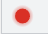, так как мы уже получили нужные нам запросы и мы не хотим, чтобы в список попали лишние
5. В итоговом списке мы имеем все запросы имеющие отношение к тому действию, которое мы совершили на сайте. Далее мы будем работать с этим списком

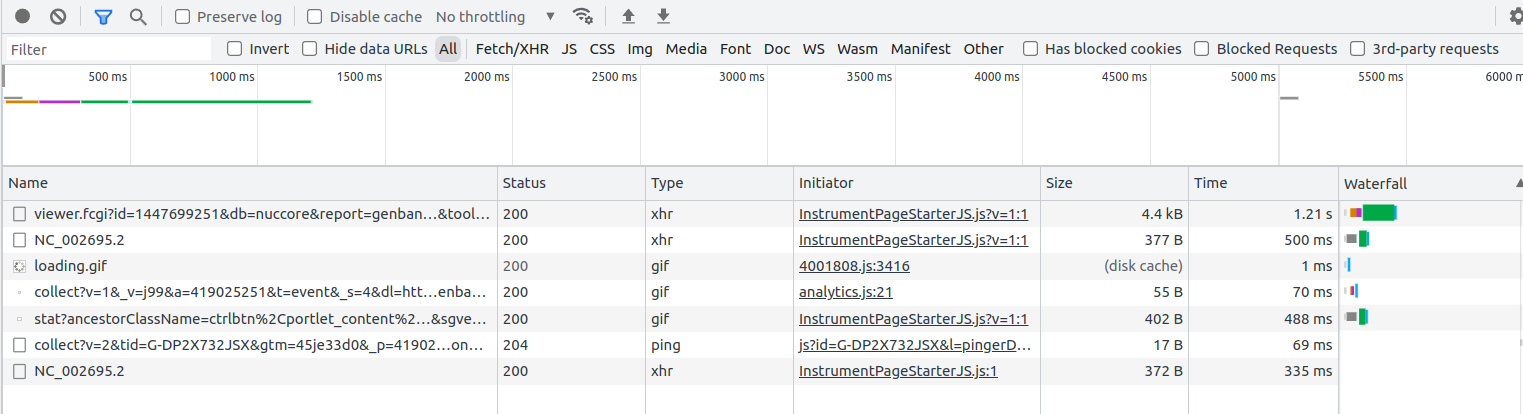

### Меню запроса

При клике на конкретный запрос нам открывается меню запроса. Здесь собрана вся нужная нам информация о запросе.
1. Полный URL запроса (вкладка **Headers**)
2. Метод запроса (вкладка **Headers**)
3. Статус-код ответа (вкладка **Headers**)
4. Все заголовки запроса и ответа (вкладка **Headers**)
5. Содержимое тела запроса (вкладка **Payload**)
6. Содеримое тела ответа (вкладка **Response**)
7. и многое другое

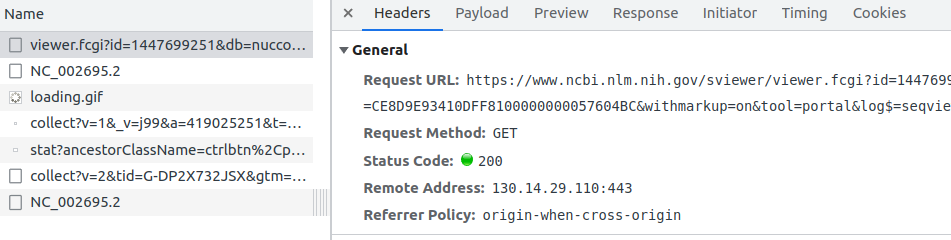

### Анализируем список запросов

Очень важно научиться хорошо отличать на глаз "нужные" запросы от ненужных. Этого проще добиться опытным путём, но в данном случае можно заметить некоторые закономерности:
1. Для некоторых запросов в колонке **Type** указано `gif`. Скорее всего это какие-то запросы, которые были нужны для загрузки картинки, **они нам не интересны**
2. Нажмём на предпоследний запрос и откроем меню запроса. В URL запроса мы увидим хоста `www.google-analytics.com`, очень маловероятно, что Genbank хранит последовательности на сервере гугла, поэтому данный запрос мы **пропускаем**
3. Проверим второй запрос. Для него уже указан более адекватный URL (`https://www.ncbi.nlm.nih.gov/nuccore/NC_002695.2`) и, в целом, он выглядит подходяще. Проверив вкладку **Payload**, мы даже увидим, что в теле запроса были параметры `1000` и `2000`, обозначающие наш целевой интервал, это очень хороший знак! Тем не менее содержимое вкладки **Response** пусто, что довольно странно. Так что на всякий случай проверим ещё и первый запрос

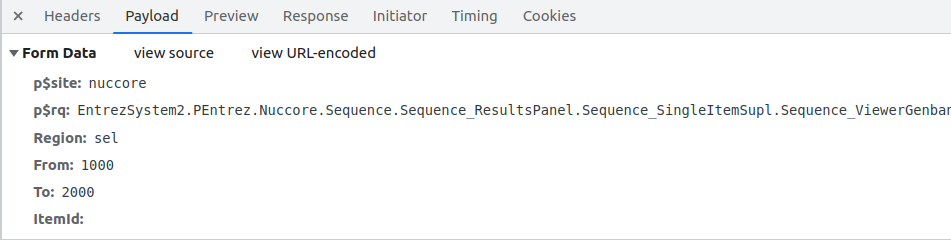

4. Перед тем как более подробно проверять первый запрос, заметим, что в колонке **Time** для данного запроса указана продолжительность в **1.21s**, что довольно долго для обычного запроса. Это сигнализирует нам о том, что запрос загружал какой-то относительно большой объём данных. Из меню запроса мы выясним, что это GET запрос на URL, принадлежащий NCBI. Во вкладке **Payload** указаны параметры query string среди которых есть и наш интервал `1000` и `2000`, а также дополнительные параметры. А во вкладке **Response** мы увидим содержимое HTML страницы, на которой есть нужная нам последовательность!!!

Учитывая все факторы, первый запрос подходит нам больше всего (первый на вкладке Network, четвёртый из тех, что мы рассматривали). Однако, как вы могли заметить, рассуждения выше применимы только к данному случаю. При анализе других страниц нужно всегда в первую очередь опираться на контекст задачи, универсальных правил и рекомендаций здесь нет. Золотое правило тут только одно &mdash; **если в результате какого-то действия в браузере у вас на странице появиись какие-то данные, значит запрос, который это сделал, уже присутствует на вкладке Network** (исключение составляют только данные сгененерированные у вас локально, без участия запросов)

Повторить найденный запрос в питоне проще простого, в меню запроса есть все необходимые данные, нужно просто правильно перенести это в питон

In [29]:
query_string_params = {
    "id": "1447699251",
    "db": "nuccore",
    "report": "genbank",
    "from": "1000",
    "to": "2000",
    "retmode": "html",
    "ncbi_phid": "CE8D9E93410DFF8100000000057604BC",
    "withmarkup": "on",
    "tool": "portal",
    "log$": "seqview",
    "maxdownloadsize": "1000000"
}

response = requests.get("https://www.ncbi.nlm.nih.gov/sviewer/viewer.fcgi", params=query_string_params)
soup = BeautifulSoup(response.content, "lxml")
sequence_elements = soup.find_all("span", class_="ff_line")
sequence = "".join([elem.text.replace(" ", "") for elem in sequence_elements])
sequence

'cctgtttacgcgccgattgttgcgagatttggacggacgttgacggggtatatacctgcgacccgcgtcaggtgcccgatgcgaggttgttgaaatcgatgtcctaccaggaagcgatggagctttcctacttcggcgctaaagttcttcacccccgcaccattacccccatcgcccagttccagatcccttgcctgattaaaaataccggaaatcctcaagctccaggtacgctcattggtgccagtcgtgatgaagacgaattaccggtcaagggcatttccaatctgaataatatggcaatgttcagcgtttccggcccggggatgaaaggaatggtcggcatggcggcgcgcgtctttgctgcaatgtcacgcgcccgtatttccgtggtgctgattacgcaatcatcttccgaatacagtatcagtttctgcgttccgcaaagcgactgtgtgcgagctgaacgggcaatgcaggaagagttctacctggaactgaaagaaggcttactggagccgctggcggtgacggaacggctggccattatctcggtggtaggtgatggtatgcgcaccttgcgtgggatctcggcgaaattctttgccgcgctggcccgcgccaatatcaacattgtcgctattgctcagggatcttctgaacgctcaatctctgtcgtggtaaataacgatgatgcgaccactggcgtgcgcgttactcatcagatgctgttcaataccgatcaggttatcgaagtgtttgtgattggcgtcggtggcgttggcggtgcgctgctggagcaactgaagcgtcagcaaagctggttgaagaataaacatatcgacttacgtgtctgcggtgttgctaactcgaaggctctgctcaccaatgtgcatggcctaaatctggaaaactggcaggaagaactggcgcaagccaaagagccgtttaatctcgggcgcttaattcgcctcgtgaaagaatatcatctgctgaacc

Всё работает, мы смогли сделать нужный запрос и получить последовательность. Далеко не факт, что мы смогли бы так сделать исследуя только HTML

### Анализируем параметры запроса

Многие из найденных параметров для данного запроса являются избыточными для нашей задачи и их можно попробовать удалить, опять же всё выясняется опытным путём. В этом примере набор параметров можно сократить до следующего:

In [36]:
query_string_params = {
    "id": "1447699251",
    "db": "nuccore",
    "report": "genbank",
    "from": "1000",
    "to": "2000",
    "withmarkup": "on",
}

response = requests.get("https://www.ncbi.nlm.nih.gov/sviewer/viewer.fcgi", params=query_string_params)
soup = BeautifulSoup(response.content, "lxml")
sequence_elements = soup.find_all("span", class_="ff_line")
sequence = "".join([elem.text.replace(" ", "") for elem in sequence_elements])
sequence

'cctgtttacgcgccgattgttgcgagatttggacggacgttgacggggtatatacctgcgacccgcgtcaggtgcccgatgcgaggttgttgaaatcgatgtcctaccaggaagcgatggagctttcctacttcggcgctaaagttcttcacccccgcaccattacccccatcgcccagttccagatcccttgcctgattaaaaataccggaaatcctcaagctccaggtacgctcattggtgccagtcgtgatgaagacgaattaccggtcaagggcatttccaatctgaataatatggcaatgttcagcgtttccggcccggggatgaaaggaatggtcggcatggcggcgcgcgtctttgctgcaatgtcacgcgcccgtatttccgtggtgctgattacgcaatcatcttccgaatacagtatcagtttctgcgttccgcaaagcgactgtgtgcgagctgaacgggcaatgcaggaagagttctacctggaactgaaagaaggcttactggagccgctggcggtgacggaacggctggccattatctcggtggtaggtgatggtatgcgcaccttgcgtgggatctcggcgaaattctttgccgcgctggcccgcgccaatatcaacattgtcgctattgctcagggatcttctgaacgctcaatctctgtcgtggtaaataacgatgatgcgaccactggcgtgcgcgttactcatcagatgctgttcaataccgatcaggttatcgaagtgtttgtgattggcgtcggtggcgttggcggtgcgctgctggagcaactgaagcgtcagcaaagctggttgaagaataaacatatcgacttacgtgtctgcggtgttgctaactcgaaggctctgctcaccaatgtgcatggcctaaatctggaaaactggcaggaagaactggcgcaagccaaagagccgtttaatctcgggcgcttaattcgcctcgtgaaagaatatcatctgctgaacc

Можно догадаться, что `id` это некоторый уникальный идентификатор последовательности в Genbank, так как в запросе нет других параметров по которым потенциально можно было бы идентифицировать последовательность. Если бы мы выяснили способ нахождения соответствия между Genbank ID (NC_002695.2) и этой штукой, то мы смогли бы скачивать произвольные последовательности при помощи запросов. Хотя чисто из любопытства, подставив `NC_002695.2` в качестве `id`, мы выясним, что это тоже работает!

Вот так, буквально две строки кода и мы уже умеем скачивать любую последовательность с Genbank без использования каких-то специализированных библиотек (requests и bs4 не в счёт)

In [48]:
query_string_params = {
    "id": "NC_002695.2",
    "db": "nuccore",
    "report": "genbank",
    "from": "1000",
    "to": "2000",
    "withmarkup": "on",
}

response = requests.get("https://www.ncbi.nlm.nih.gov/sviewer/viewer.fcgi", params=query_string_params)
soup = BeautifulSoup(response.content, "lxml")
sequence_elements = soup.find_all("span", class_="ff_line")
sequence = "".join([elem.text.replace(" ", "") for elem in sequence_elements])
sequence

'cctgtttacgcgccgattgttgcgagatttggacggacgttgacggggtatatacctgcgacccgcgtcaggtgcccgatgcgaggttgttgaaatcgatgtcctaccaggaagcgatggagctttcctacttcggcgctaaagttcttcacccccgcaccattacccccatcgcccagttccagatcccttgcctgattaaaaataccggaaatcctcaagctccaggtacgctcattggtgccagtcgtgatgaagacgaattaccggtcaagggcatttccaatctgaataatatggcaatgttcagcgtttccggcccggggatgaaaggaatggtcggcatggcggcgcgcgtctttgctgcaatgtcacgcgcccgtatttccgtggtgctgattacgcaatcatcttccgaatacagtatcagtttctgcgttccgcaaagcgactgtgtgcgagctgaacgggcaatgcaggaagagttctacctggaactgaaagaaggcttactggagccgctggcggtgacggaacggctggccattatctcggtggtaggtgatggtatgcgcaccttgcgtgggatctcggcgaaattctttgccgcgctggcccgcgccaatatcaacattgtcgctattgctcagggatcttctgaacgctcaatctctgtcgtggtaaataacgatgatgcgaccactggcgtgcgcgttactcatcagatgctgttcaataccgatcaggttatcgaagtgtttgtgattggcgtcggtggcgttggcggtgcgctgctggagcaactgaagcgtcagcaaagctggttgaagaataaacatatcgacttacgtgtctgcggtgttgctaactcgaaggctctgctcaccaatgtgcatggcctaaatctggaaaactggcaggaagaactggcgcaagccaaagagccgtttaatctcgggcgcttaattcgcctcgtgaaagaatatcatctgctgaacc

`db` это явно указание на базу данных. `nuccore` в терминологии NCBI это Genbank, а учитывая то, что в остальных местах в запросе нет никакого указания на БД, то этот параметр скорее всего также можно варьировать, надо только выяснить принимаемые им значения.

С первого взгляда не понятно, что такое `report`. Но учитывая то, что он принимает значение `genbank`, а параметр для указания БД у нас уже был, то с большой вероятностью это указание на формат данных. Ради эксперимента попробуем указать туда `fasta` и убедимся, что это работает

In [38]:
query_string_params = {
    "id": "NC_002695.2",
    "db": "nuccore",
    "report": "fasta",
    "from": "1000",
    "to": "2000",
    "withmarkup": "on",
}

response = requests.get("https://www.ncbi.nlm.nih.gov/sviewer/viewer.fcgi", params=query_string_params)
print(response.text)

>NC_002695.2:1000-2000 Escherichia coli O157:H7 str. Sakai DNA, complete genome
CCTGTTTACGCGCCGATTGTTGCGAGATTTGGACGGACGTTGACGGGGTATATACCTGCGACCCGCGTCA
GGTGCCCGATGCGAGGTTGTTGAAATCGATGTCCTACCAGGAAGCGATGGAGCTTTCCTACTTCGGCGCT
AAAGTTCTTCACCCCCGCACCATTACCCCCATCGCCCAGTTCCAGATCCCTTGCCTGATTAAAAATACCG
GAAATCCTCAAGCTCCAGGTACGCTCATTGGTGCCAGTCGTGATGAAGACGAATTACCGGTCAAGGGCAT
TTCCAATCTGAATAATATGGCAATGTTCAGCGTTTCCGGCCCGGGGATGAAAGGAATGGTCGGCATGGCG
GCGCGCGTCTTTGCTGCAATGTCACGCGCCCGTATTTCCGTGGTGCTGATTACGCAATCATCTTCCGAAT
ACAGTATCAGTTTCTGCGTTCCGCAAAGCGACTGTGTGCGAGCTGAACGGGCAATGCAGGAAGAGTTCTA
CCTGGAACTGAAAGAAGGCTTACTGGAGCCGCTGGCGGTGACGGAACGGCTGGCCATTATCTCGGTGGTA
GGTGATGGTATGCGCACCTTGCGTGGGATCTCGGCGAAATTCTTTGCCGCGCTGGCCCGCGCCAATATCA
ACATTGTCGCTATTGCTCAGGGATCTTCTGAACGCTCAATCTCTGTCGTGGTAAATAACGATGATGCGAC
CACTGGCGTGCGCGTTACTCATCAGATGCTGTTCAATACCGATCAGGTTATCGAAGTGTTTGTGATTGGC
GTCGGTGGCGTTGGCGGTGCGCTGCTGGAGCAACTGAAGCGTCAGCAAAGCTGGTTGAAGAATAAACATA
TCGACTTACGTGTCTGCGGTGTTGCTAACTCGAAGGCTCTGCTCACCAATGTGCATGGCCTAAATCTG

Ну и с параметрами для интервалов тоже всё понятно, их можно варьировать

In [44]:
query_string_params = {
    "id": "NC_002695.2",
    "db": "nuccore",
    "report": "fasta",
    "from": "999",
    "to": "1102",
    "withmarkup": "on",
}

response = requests.get("https://www.ncbi.nlm.nih.gov/sviewer/viewer.fcgi", params=query_string_params)
print(response.text)

>NC_002695.2:999-1102 Escherichia coli O157:H7 str. Sakai DNA, complete genome
GCCTGTTTACGCGCCGATTGTTGCGAGATTTGGACGGACGTTGACGGGGTATATACCTGCGACCCGCGTC
AGGTGCCCGATGCGAGGTTGTTGAAATCGATGTC




Что такое `withmarkup` не совсем понятно. Но попробовав различные варианты запросов, различные значения для данного параметра ("on" и "off"), а также его полное удаление, можно сделать вывод, что данный параметр показывает, будет ли использован HTML в тексте ответа в Genbank формате

In [54]:
query_string_params = {
    "id": "NC_002695.2",
    "db": "nuccore",
    "report": "genbank",
    "from": "1000",
    "to": "2000",
    "withmarkup": "on",   # С использованием HTML в последовательности
}

response = requests.get("https://www.ncbi.nlm.nih.gov/sviewer/viewer.fcgi", params=query_string_params)
print(*response.text.split("\n")[-10:], sep="\n")

      661 <span class="ff_line" id="NC_002695.2_661">aacgctcaat ctctgtcgtg gtaaataacg atgatgcgac cactggcgtg cgcgttactc</span>
      721 <span class="ff_line" id="NC_002695.2_721">atcagatgct gttcaatacc gatcaggtta tcgaagtgtt tgtgattggc gtcggtggcg</span>
      781 <span class="ff_line" id="NC_002695.2_781">ttggcggtgc gctgctggag caactgaagc gtcagcaaag ctggttgaag aataaacata</span>
      841 <span class="ff_line" id="NC_002695.2_841">tcgacttacg tgtctgcggt gttgctaact cgaaggctct gctcaccaat gtgcatggcc</span>
      901 <span class="ff_line" id="NC_002695.2_901">taaatctgga aaactggcag gaagaactgg cgcaagccaa agagccgttt aatctcgggc</span>
      961 <span class="ff_line" id="NC_002695.2_961">gcttaattcg cctcgtgaaa gaatatcatc tgctgaaccc g</span>
//</pre>
<a name="slash_NC_002695.2"></a></div>




In [55]:
query_string_params = {
    "id": "NC_002695.2",
    "db": "nuccore",
    "report": "genbank",
    "from": "1000",
    "to": "2000",
    "withmarkup": "off",   # Без использования HTML в последовательности
}

response = requests.get("https://www.ncbi.nlm.nih.gov/sviewer/viewer.fcgi", params=query_string_params)
print(*response.text.split("\n")[-10:], sep="\n")

      661 aacgctcaat ctctgtcgtg gtaaataacg atgatgcgac cactggcgtg cgcgttactc
      721 atcagatgct gttcaatacc gatcaggtta tcgaagtgtt tgtgattggc gtcggtggcg
      781 ttggcggtgc gctgctggag caactgaagc gtcagcaaag ctggttgaag aataaacata
      841 tcgacttacg tgtctgcggt gttgctaact cgaaggctct gctcaccaat gtgcatggcc
      901 taaatctgga aaactggcag gaagaactgg cgcaagccaa agagccgttt aatctcgggc
      961 gcttaattcg cctcgtgaaa gaatatcatc tgctgaaccc g
//</pre>
<a name="slash_NC_002695.2"></a></div>




Но вернёмся ненадолго к запросу, который мы отбросили, но который был довольно многообещающим, проверим его для чистоты эксперимента

In [59]:
payload = {
    "p$site": "nuccore",
    "p$rq": "EntrezSystem2.PEntrez.Nuccore.Sequence.Sequence_ResultsPanel.Sequence_SingleItemSupl.Sequence_ViewerGenbankSidePanel.Sequence_ViewerChangeRegion:SetSelRegion",
    "Region": "sel",
    "From": "1000",
    "To": "2000",
    "ItemId": ""
}

response = requests.post("https://www.ncbi.nlm.nih.gov/nuccore/NC_002695.2", data=payload)
response.text

'{}'

Действительно, ничего интересного

## Что вообще происходило в последнем примере? Где тут системность?

**Web scrapping**, как уже упоминалось ранее, это крайне творческий процесс, и, я думаю, вы уже успели это заметить. Существуют простые сайты, как [wooordhunt](https://wooordhunt.ru/), с которыми можно за минуту составить запрос, глядя только на HTML или URL. Но бывают и сложные сайты у которых очень запутанные системы запросов, форм и так далее. Нужно вручную анализировать запросы и пытаться понять смысл параметров этих запросов из контекста, как мы это делали в примерах выше, тогда вы сможете эффективно пользоваться данной технологией. Ни о какой системности тут, к сожалению не может идти и речи, к каждому сайту нужен свой подход. Так что не бойтесь эксперементировать и ошибаться

Но давайте попробуем представить картину того, как устроена исследуемая нами страница.

На странице есть форма, которая покрывает всю страницу и отправляется на URL `/nuccore` при помощи POST запроса (это можно выяснить, глядя на тэг `form`). Это идёт вразрез с тем, что мы обнаружили. Наш запрос делается на URL `/sviewer/viewer.fcgi` при помощи GET запроса. Это значит, что форма скорее всего ответственна за поисковую строку вверху страницы, но не за отображение последовательности. Но также возможен вариант, когда после запроса с заполненной формой на адрес `/nuccore` происходит **перенаправление (Redirect)**

Но если настройки отображения последовательности не привязаны к форме, то как тогда происходит запрос?

Скорее всего к кнопке "Update view" привязан какой-то скрипт, который берёт значения из нужных тэгов `input` и внутри себя формирует и делает нужный запрос, то есть не имеет никакого отношения к форме. Такие ситуации можно поймать только при помощи Developer Tools. К сожалению, такая практика является относительно распространённой, то есть логика запросов передаётся от браузера (который тупо берёт URL из тэга `form` и делает запрос) к скриптам, поведение которых может быть сложным и заранее неизвестным.

Также можно заметить, что наш целевой обнаруженный запрос вовращает не всю HTML страницу целиком, а только ту часть, которая ответственна за отображение информации о последовательности. То есть при нажатии "Update view" гипотетический скрипт, который делает запрос, получает эти данные и **встраивает** в уже имеющуюся страницу. Это объясняет тот факт, что у нас в процессе не изменяется URL, так как по сути мы остаёмся на той же самой странице, но делаем запрос только  для получения новых данных, чтобы отобразить их на этой же странице

# Ограничения web scrapping'а

Web scrapping о котором мы говорили последние две лекции это довольно крутая штука, но не все сайты любят, когда вы этим занимаетесь, поэтому они могут создавать некоторые ограничения. При этом, чем популярнее сервис, тем выше вероятность, что он будет хорошо защищён. С другой стороны, у популярных сервисов почти всегда есть публичный API. При наличии оного вам следует отдавать предпочтение именно ему, а не web scrapping'у. Но публичный API есть не всегда, а получать данные в автоматическом режиме как-то хочется, поэтому вы можете столкнуться с следующими преградами

## Блокировка частых запросов

Все механизмы борьбы с web scrapping'ом основаны на детектировании того, что вы не человек, сидящий в интернете через браузер, а автоматизированная программа.

Один из самых простых вариантов детекции скрэпперов это детекция по **частоте запросов**. Чем чаще вы делаете запросы, тем более вероятно, что на вас падёт подозрение. В случае детекции вашему IP адресу временно ограничат доступ к ресурсу. Обойти это очень просто, нужно делать запросы через какие-то интервалы времени

Вот так не годится, вас быстро заблокируют
```python
for _ in range(100000):
    requests.get(url)
```

Вот так уже лучше
```python
for _ in range(100000):
    requests.get(url)
    time.sleep(0.1)
```

А вот так вас почти точно не заметят
```python
for _ in range(100000):
    requests.get(url)
    time.sleep(1)
```

## Капчи

В случае, если сервис поймёт, что вы скрэппер, то он может предложить вам ввести капчу. И да, эта проверка сделана не чтобы отличить вас от робота по интеллектуальным способностям, а просто чтобы вставить вам палку в колесо и не дать вам сделать запрос. Современные нейросети с лёгкостью решают каптчи, вся проблема тут в том, чтобы написать код для взаимодействия с ними. Заполнение каптчи через питон это отдельная головная боль, лучше просто забить на это

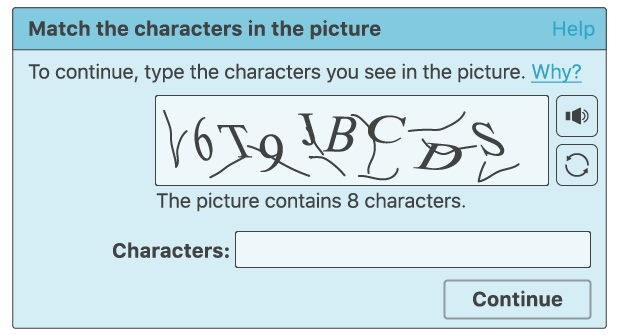

## Сервисы, расчитанные на низкую нагрузку

Малопопулярные сервисы могут не иметь никакой защиты и более того, не выдерживать большой нагрузки по входящим запросам. Ваши запросы из питона могут просто заблокировать использование сервиса для других пользователей (так как ему может не хватить вычислительных ресурсов для обработки всех запросов). Будьте аккуратнее с такими сервисами и не забывайте, что другие люди тоже, возможно, хотят ими воспользоваться, вы в интернете не одни

## Скреппинг персональных данных

Web scrapping абсолютно легален с точки зрения законодательств разных стран. Однако, не стоит заниматься скреппингом персональных данных (в том числе общедоступных), а также интеллектуальной собственности, это считается неэтичным

## Другие варианты детекции

Обнаружить, что вы скреппер можно по вашему заголовку `user-agent` в запросе, по кукам, по IP адресу, по паттерну запросов и много по чему ещё, поэтому не все веб-сайты доступны для скрэппинга. Например, Яндекс-маркет, детектирует скреппинг с одного запроса и кидает капчу

# Итог

Теперь вы уверенно можете пользоваться интернетом из Python, вытаскивать нужную информацию с веб-страниц, анализировать URL и моделировать сложные действия на сайте при помощи питона. Для большей практики просто достаточно найти любой понравившийся вам сайт.

Обобщённый алгоритм получения информации из интернета через питон можно представить так:
1. Определите то, что вы ищите
2. Проделайте действия для получения нужной информации в веб-браузере
3. Определите, какие запросы стоят за действиями из пункта 2 и какие данные отправляются/получаются в этих запросах
4. Воспоизведите запросы из пункта 3 в питоне
5. Распарсите/обработайте/сохраните полученные из запросов данные